In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rk4_step(f, t, y, h):
    """Un pas de RK4"""
    k1 = f(t, y)
    k2 = f(t + h/2, y + (h/2)*k1)
    k3 = f(t + h/2, y + (h/2)*k2)
    k4 = f(t + h, y + h*k3)
    return y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

def solve_rk4(f, t0, y0, h, tf):
    """Résout l'EDO avec RK4 sur [t0, tf]"""
    n_steps = int((tf - t0) / h)
    t = np.linspace(t0, tf, n_steps + 1)
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = rk4_step(f, t[i-1], y[i-1], h)
    return t, y

def euler_step(f, t, y, h):
    """Un pas de la méthode d'Euler explicite"""
    return y + h * f(t, y)

def solve_euler(f, t0, y0, h, tf):
    """Résout l'EDO avec Euler sur [t0, tf]"""
    n_steps = int((tf - t0) / h)
    t = np.linspace(t0, tf, n_steps + 1)
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = euler_step(f, t[i-1], y[i-1], h)
    return t, y

def f(t, y):
    return y * (1 - y)

In [4]:
t0, y0, tf = 0, 0.5, 5

## solution exacte fine pour interpolation
t_exact_fine = np.linspace(t0, tf, 10000)
y_exact_fine = 1 / (1 + np.exp(-t_exact_fine))

## calcul des erreurs pour RK4 (pour tableau 2)
hs_rk4 = [0.1, 0.05, 0.01]
print("=== ERREURS RK4 (pour TABLEAU 2) ===")
errors_rk4 = []
for h in hs_rk4:
    t_rk4, y_rk4 = solve_rk4(f, t0, y0, h, tf)
    y_interp = np.interp(t_rk4, t_exact_fine, y_exact_fine)
    error_max = np.max(np.abs(y_interp - y_rk4))
    errors_rk4.append(error_max)
    print(f"h={h}: Erreur max = {error_max:.1e}")

## calcul des erreurs pour Euler (pour tableau 3)
hs_euler = [0.1, 0.05]
print("\n=== ERREURS EULER (pour TABLEAU 3) ===")
errors_euler = []
for h in hs_euler:
    t_euler, y_euler = solve_euler(f, t0, y0, h, tf)
    y_interp = np.interp(t_euler, t_exact_fine, y_exact_fine)
    error_max = np.max(np.abs(y_interp - y_euler))
    errors_euler.append(error_max)
    print(f"h={h}: Erreur max = {error_max:.1e}")

t_rk4, y_rk4 = solve_rk4(f, t0, y0, 0.1, tf)
t_plot = np.linspace(t0, tf, 1000)
y_exact_plot = 1 / (1 + np.exp(-t_plot))

=== ERREURS RK4 (pour TABLEAU 2) ===
h=0.1: Erreur max = 4.6e-08
h=0.05: Erreur max = 1.7e-09
h=0.01: Erreur max = 2.5e-09

=== ERREURS EULER (pour TABLEAU 3) ===
h=0.1: Erreur max = 4.7e-03
h=0.05: Erreur max = 2.3e-03


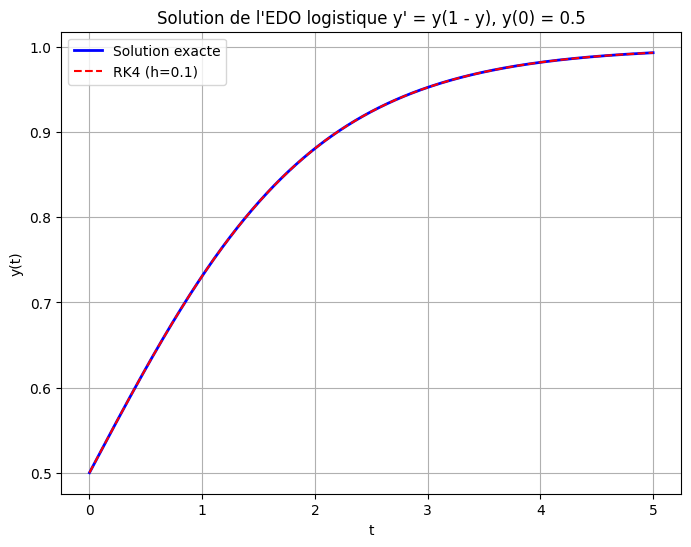

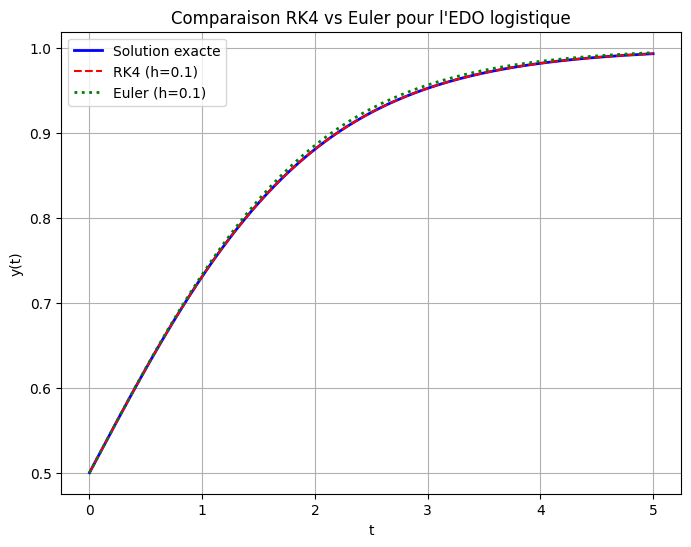


Valeur finale exacte y(5) = 0.993307


In [5]:
plt.figure(figsize=(8, 6))
plt.plot(t_plot, y_exact_plot, 'b-', linewidth=2, label='Solution exacte')
plt.plot(t_rk4, y_rk4, 'r--', markersize=4, label='RK4 (h=0.1)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution de l\'EDO logistique y\' = y(1 - y), y(0) = 0.5')
plt.legend()
plt.grid(True)
plt.savefig('graph.pdf', format='pdf', bbox_inches='tight')
plt.show()

## comparaison RK4 vs Euler (h=0.1) vs exacte
t_euler, y_euler = solve_euler(f, t0, y0, 0.1, tf)
plt.figure(figsize=(8, 6))
plt.plot(t_plot, y_exact_plot, 'b-', linewidth=2, label='Solution exacte')
plt.plot(t_rk4, y_rk4, 'r--', markersize=4, label='RK4 (h=0.1)')
plt.plot(t_euler, y_euler, 'g:', linewidth=2, label='Euler (h=0.1)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparaison RK4 vs Euler pour l\'EDO logistique')
plt.legend()
plt.grid(True)
plt.savefig('graph_euler.pdf', format='pdf', bbox_inches='tight')
plt.show()

## les valeurs finales pour vérif
print(f"\nValeur finale exacte y(5) = {y_exact_fine[-1]:.6f}")